In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df = df.rename(columns = {"country" : "Country",
                          "GDP per capita (current US$)" : "GDP",
                          "Trade (% of GDP)" : "Trade",
                          "Population, total" : "Total_Population",
                          "Rural population" : "Rural_Population"})
df.head()

,Country,GDP,Trade,Total_Population,Rural_Population
0,Afghanistan,524.162881,37172386.0,27695286.0,49.235892
1,Albania,5284.380184,2866376.0,1137407.0,76.801047
2,Algeria,4114.715061,42228429.0,11558343.0,57.964569
3,American Samoa,11466.690706,55465.0,7126.0,168.238994
4,Andorra,41793.055258,77006.0,9193.0,0.000000


In [3]:
df.isnull().sum()

Country             0
GDP                 0
Trade               0
Total_Population    0
Rural_Population    0
dtype: int64

In [4]:
owid = pd.read_csv("owid-co2-data.csv")

df_filtered = owid[(owid["year"] == 2018)]

co2 = df_filtered[["country","co2"]]
co2 = co2.reset_index()

del co2["index"]

co2.head()

,country,co2
0,Afghanistan,9.439
1,Africa,1400.841
2,Albania,4.570
3,Algeria,155.725
4,Andorra,0.471


In [5]:
co2.isnull().sum()

country    0
co2        0
dtype: int64

In [6]:
main_df = pd.concat([df.set_index('Country'), co2.set_index('country')], axis = 1)
main_df = main_df.dropna(axis = 0, how = "any")
main_df = main_df.reset_index()

del main_df["index"]

main_df.head()

,GDP,Trade,Total_Population,Rural_Population,co2
0,524.162881,37172386.0,27695286.0,49.235892,9.439
1,5284.380184,2866376.0,1137407.0,76.801047,4.570
2,4114.715061,42228429.0,11558343.0,57.964569,155.725
3,41793.055258,77006.0,9193.0,0.000000,0.471
4,3289.646664,30809762.0,10625055.0,66.378012,34.537


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GDP               177 non-null    float64
 1   Trade             177 non-null    float64
 2   Total_Population  177 non-null    float64
 3   Rural_Population  177 non-null    float64
 4   co2               177 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


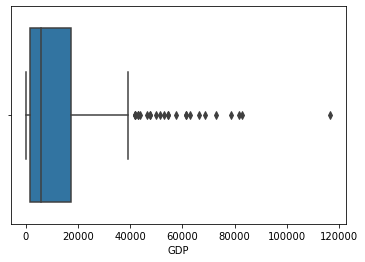

In [8]:
sns.boxplot(x = main_df["GDP"]);

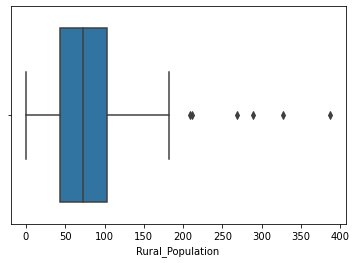

In [9]:
sns.boxplot(x = main_df["Rural_Population"]);

In [10]:
co2 = main_df["co2"]

del main_df["co2"]

co2.head()

0      9.439
1      4.570
2    155.725
3      0.471
4     34.537
Name: co2, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(main_df, co2, test_size = 0.33)

from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)

y_pred = gbm.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

974.2642115854882

In [13]:
gbmtun = GradientBoostingRegressor(learning_rate = 1,
                                   loss = "lad",
                                   max_depth = 3,
                                   n_estimators = 75).fit(x_train, y_train)

y_pred2 = gbmtun.predict(x_test)

np.sqrt(mean_squared_error(y_test, y_pred2))

633.7803678784837

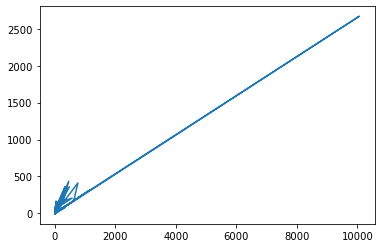

In [14]:
plt.plot(y_test, y_pred);

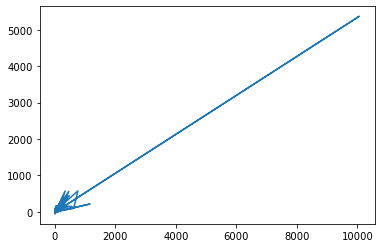

In [15]:
plt.plot(y_test, y_pred2);

In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor(colsample_bytree = 0.5,
                   learning_rate = 0.05,
                   max_depth = 1,
                   n_estimators = 50).fit(x_train, y_train)

y_pred3 = xgb.predict(x_test)

np.sqrt(mean_squared_error(y_test,y_pred3))

913.4911847886923

In [18]:
from sklearn.neighbors import KNeighborsRegressor

HKO  = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred4 = knn_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
    HKO.append(rmse)
    print("k =", "k, için hatalar karesi ortalaması değeri = ", rmse)

k = k, için hatalar karesi ortalaması değeri =  978.3869362623083
k = k, için hatalar karesi ortalaması değeri =  726.0226615335403
k = k, için hatalar karesi ortalaması değeri =  694.0602866768186
k = k, için hatalar karesi ortalaması değeri =  829.3227118484442
k = k, için hatalar karesi ortalaması değeri =  921.67066942693
k = k, için hatalar karesi ortalaması değeri =  985.0652816713385
k = k, için hatalar karesi ortalaması değeri =  1035.417612785145
k = k, için hatalar karesi ortalaması değeri =  1068.9547224743092
k = k, için hatalar karesi ortalaması değeri =  1094.4949718774003
k = k, için hatalar karesi ortalaması değeri =  1111.6063113743219
